# 10.3 RANDOM WALK WITH RANDOM WAITING TIMES

Use this notebook to store your work for this problem.

In [2]:
#*************************************************************
# Mario Segura
# Problem 10.3

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

#Random

from numpy.random import default_rng
rng = default_rng()
rand = rng.random


## (a)

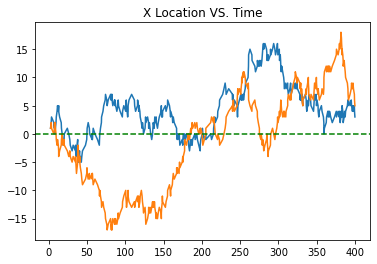

In [39]:
Beta = 1
Rand_N = -((1/Beta) * np.log(rand(400))).cumsum()
t = Rand_N[(Rand_N > 0) * (Rand_N < 400)]
N_Steps = len(t)

X_Rand1 = 2*(rand(N_Steps) < 0.5) - 1
X_1 = X_Rand1.cumsum()

X_Rand2 = 2*(rand(N_Steps) < 0.5) - 1
X_2 = X_Rand2.cumsum()

plt.figure()
plt.title('X Location VS. Time')
plt.plot(t,X_1)
plt.plot(t,X_2)

plt.axhline(y=0, color ='green', linestyle = '--')

## (b)

In [4]:
Sims = 50
Beta = 1
End_Ts = [200, 400, 600]

Mean = np.zeros(3)
Var = np.zeros(3)
End_Ps = np.zeros(Sims)

a = 0

for i in End_Ts:
    for n in range(Sims):
        Rand_N = -((1/Beta) * np.log(rand(2*i))).cumsum()
        t = Rand_N[(Rand_N > 0) * (Rand_N < i)]
        N_Steps = len(t)
        X_Rand = 2*(rand(N_Steps) < 0.5) - 1
        x = X_Rand.cumsum()
        End_Ps[n] = x[-1]
    Mean[a] = End_Ps.mean()
    Var[a] = End_Ps.var()
    a = a + 1
        
print('Mean : ', Mean)
print('Variance : ', Var)

Mean :  [-0.46 -1.    4.9 ]
Variance :  [254.6084 322.6    622.13  ]


## (c)

## (d)

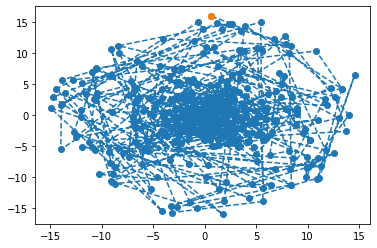

In [5]:
#*******2 Dimensions
Beta = 1
Rand_N = -((1/Beta) * np.log(rand(400))).cumsum()
t = Rand_N[(Rand_N > 0) * (Rand_N < 400)]

N_Steps = len(t)
X_Rand = 2*(rand(N_Steps) < 0.5) - 1
x = X_Rand.cumsum()

Y_rand = np.random.uniform(0,2,N_Steps)
angle = np.pi * Y_rand
Y = x * np.sin(angle)
X = x * np.cos(angle)
plt.plot(X,Y,"--o")
plt.plot(X[-1],Y[-1],'o-')


(e)

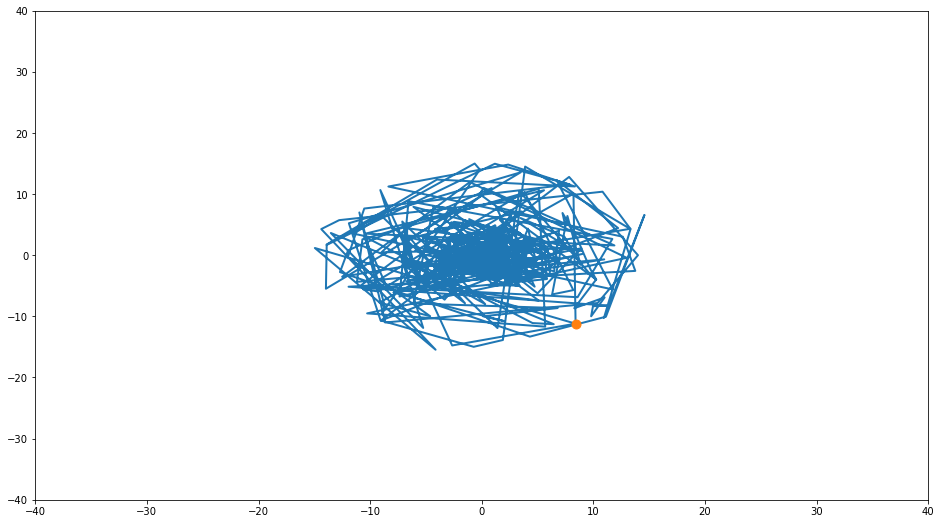

In [24]:

#**************2D Animation*************
plt.close('all')
Bound = 40
Figure = plt.figure(figsize=(16,9))
AX = plt.axes(xlim=(-Bound,Bound),ylim=(-Bound,Bound))

Line, = AX.plot([],[],lw=2)
Point, = AX.plot([],[],'o-',ms=9)

def get_step(n,x,y,Line_2,Point_2):
    Line_2.set_data(x[:n+1],y[:n+1])
    Point_2.set_data(x[n],y[n])
    return Line_2, Point_2

Video = FuncAnimation(Figure,get_step,frames=N_Steps,fargs=(X,Y,Line,Point))
Video.save('2D_Animation.mp4',fps=30,dpi=300)